# Dataset

This notebook provides basic information and notation to properly understand what the data-structures used in the machine learning model truly represent, from a theoretical point of view.

The information needed to implement any type of machine learning model is to have three main data structures, a data-matrix $X$, a label vector $y$ and a weight vector $w$.

## Data matrix $X$
The data matrix (also called dataset) $X$ is a matrix of $d \times N$, where $d$ is the number of _features_ and the dimension of the space. Consequently, one single data point is represented as $X_i$, and $j$-th feature of the datapoint $X_i$ is $X_i^j$. 

$$
X = 
\begin{bmatrix}
X_1^1       & X_1^2         & \dots     & X_1^j         & \dots     & X_1^d     \\
X_2^1       & X_2^2         & \dots     & X_2^j         & \dots     & X_2^d     \\
\vdots      & \vdots        & \ddots    & \vdots        & \ddots    & \vdots    \\
X_i^1       & X_i^2         & \dots     & X_i^j         & \dots     & X_i^d     \\
\vdots      & \vdots        & \ddots    & \vdots        & \ddots    & \vdots    \\
X_{N-1}^1   & X_{N-1}^2     & \dots     & X_{N-1}^j     & \dots     & X_{N-1}^d \\
X_N^1       & X_N^2         & \dots     & X_N^j         & \dots     & X_N^d     \\
\end{bmatrix}
$$

This means that the $i$-th datapoint will be the first row and will be composed of exactly $d$ features as follows:
$$
X_i = 
\begin{bmatrix}
X_i^1        & \dots     & X_i^j         & \dots     & X_i^d
\end{bmatrix}
$$

On the other hand, we can select the $j$-th feature as a vertical vector of $N$ values:
$$
X^j = 
\begin{bmatrix}
X^j_1 \\ \vdots \\ X^j_i \\ \vdots \\ X^j_N
\end{bmatrix}
$$

### Example
Let's now create a random dataset $X$, containing two classes of points, each of them with $N = 5$ bi-dimensional points (meaning that $d = 2$).

The first thing to do is to separately create the two features for the two classes:
- <tt>X1_1</tt> is the 1st feature of class 1 $X_1^1$
- <tt>X1_2</tt> is the 2nd feature of class 1 $X_1^2$
- <tt>X2_1</tt> is the 1st feature of class 2 $X_2^1$
- <tt>X2_2</tt> is the 2nd feature of class 2 $X_2^2$

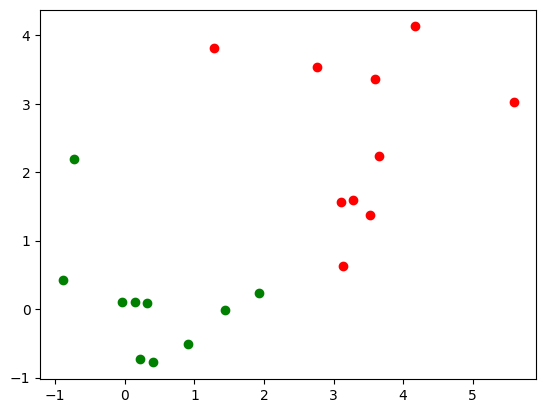

In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(265)

# number of data-points per class
N = 10

# class 1 - feature 1
X1_1 = np.random.normal(size = N)

# class 1 - feature 2
X1_2 = np.random.normal(size = N)


# class 2 - feature 1
X2_1 = np.random.normal(size = N) + 3

# class 2 - feature 2
X2_2 = np.random.normal(size = N) + 3

# plot the 2-d set of points
plt.scatter(X1_1, X1_2, color='green')
plt.scatter(X2_1, X2_2, color='red') 

Let's now merge together these 4 separate vectors into the matrix $X$, which will be a $(2 \cdot N) \times 2$ = $20 \times 2$ matrix.

In [2]:
# merge feature 1 of class 1 and 2 into one vector
X_1 = np.concatenate((X1_1, X2_1))

# merge feature 2 of class 1 and 2 into one vector
X_2 = np.concatenate((X1_2, X2_2))

# create dataset X
X = np.stack((X_1, X_2), axis = 1)

print(f"dim(X) = {X.shape[0]} x {X.shape[1]}")
print(X)

dim(X) = 20 x 2
[[ 1.92962419  0.24238552]
 [ 0.21858697 -0.73050775]
 [ 0.31718307  0.09125457]
 [ 1.44124242 -0.01314665]
 [ 0.40576359 -0.77899875]
 [-0.89214721  0.43265011]
 [-0.73117681  2.18956107]
 [-0.04622209  0.10090173]
 [ 0.90088785 -0.51514093]
 [ 0.14794735  0.1031288 ]
 [ 3.28348532  1.59033357]
 [ 3.52674319  1.36853023]
 [ 3.13581246  0.63547144]
 [ 3.10488823  1.5598407 ]
 [ 1.2789547   3.81042516]
 [ 3.60265178  3.35896028]
 [ 2.76350309  3.54081162]
 [ 5.58955181  3.02659444]
 [ 4.17102778  4.128368  ]
 [ 3.64921912  2.23430821]]


## Label vector $y$
The label vector $y$ is a vector of the __true samples__ of the oracle function. This is a vertical vector containing the true label for every sample inside the dataset $X$: this means it contains $N$ values, one for each data point.
$$
y = 
\begin{bmatrix}
y_1 \\ y_2 \\ \vdots \\ y_i \\ \vdots \\ y_N
\end{bmatrix}
$$

### Example
Let's assume that we want to divide class 1 from class 2: this means that class 1 will have a positive label while class 2 will have a negative one (or vice versa)

In [3]:
# label for class 1
y1 = np.ones(N)

# label for class 2
y2 = - np.ones(N)

# merge into a 2 * N vector
y = np.concatenate((y1, y2))

print(f"dim(y) = {y.shape[0]}")
print(y)

dim(y) = 20
[ 1.  1.  1.  1.  1.  1.  1.  1.  1.  1. -1. -1. -1. -1. -1. -1. -1. -1.
 -1. -1.]


## Weight vector $w$
The weight vector $w$ weights each feature of the dataset, therefore it is a $d$ dimensional horizontal vector.
$$
w = 
\begin{bmatrix}
w_1 & w_2 & \dots & w_j & \dots & w_d
\end{bmatrix}
$$

### Example
This vector will be updated during the training phase so it is important to make it the right dimension, then it can be a vector of only 1s or a vector of random values

In [4]:
# initialize w randomly, with size of 2
w = np.random.normal(size = X.shape[1])

print(f"dim(w) = {w.shape[0]}")
print(w)

dim(w) = 2
[-1.60107529  1.93241128]
